### Пробуємо побудувати прості графіки

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Згенеровано значень: 20
Значення по x: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
Значення по y: [ 7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75 10.   10.25
 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25]



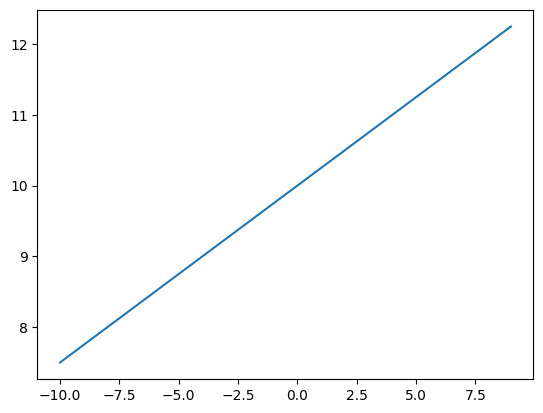

In [2]:
x = np.arange(-10, 10)
y = 10 + x/4
print(f"""
Згенеровано значень: {x.size}
Значення по x: {x}
Значення по y: {y}
""")
plt.plot(x,y)


Згенеровано значень: 20
Значення по x: [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
Значення по y: [ 90.          72.16066482  56.53739612  43.13019391  31.93905817
  22.96398892  16.20498615  11.66204986   9.33518006   9.22437673
  11.32963989  15.65096953  22.18836565  30.94182825  41.91135734
  55.09695291  70.49861496  88.11634349 107.9501385  130.        ]



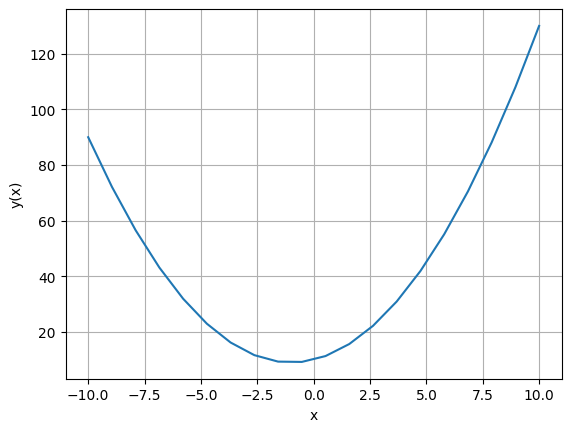

In [3]:
x = np.linspace(-10, 10, num=20)
y = x**2 + 2*x + 10
print(f"""
Згенеровано значень: {x.size}
Значення по x: {x}
Значення по y: {y}
""")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.plot(x,y)
plt.show()

[-16.75        -9.41204986  -2.87188366   2.87049861   7.81509695
  11.96191136  15.31094183  17.86218837  19.61565097  20.57132964
  20.72922438  20.08933518  18.65166205  16.41620499  13.38296399
   9.55193906   4.92313019  -0.5034626   -6.72783934 -13.75      ]


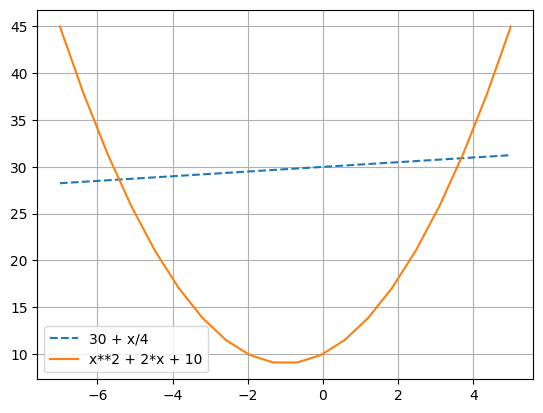

In [4]:
x = np.linspace(-7, 5, num=20)
y_a = 30 + x/4
y_b = x**2 + 2*x + 10

b = y_a - y_b
print(b)

plt.plot(x, y_a, "--", label="30 + x/4")
plt.plot(x, y_b, "-", label="x**2 + 2*x + 10")
plt.legend()
plt.grid()
plt.show()


### Заливна графіків (заповнення області)
> Пробуємо приклади заливок областей з:

> [1 - документації matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html)

> [2 - документації matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html)


> [3 - документації matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_betweenx_demo.html)


Маючи такі графіки можна видіти область потенційних розвязків системи рівнянь.
Найкраще це показано на графіку АХ2 де ми маємо область обемежену параболою зверху та кривою знизу.



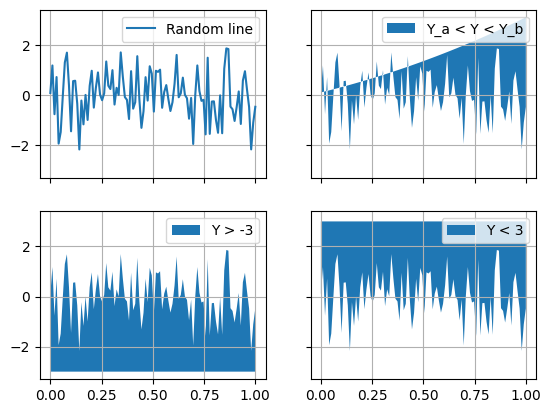

In [5]:
Nsteps = 100
x = np.linspace(0, 1, num=Nsteps)
y_a = np.random.randn(Nsteps)
y_b = x**2 + 2*x + 0.1
y_c = x*3-0.3 # пряма

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

ax1.plot(x, y_a, label="Random line")
ax2.fill_between(x, y_b, y_a, label="Y_a < Y < Y_b")

ax3.fill_between(x, y_a, -3, label="Y > -3")
ax4.fill_between(x, y_a, 3, label="Y < 3")

for ax in ax1, ax2, ax3, ax4:
    ax.grid(True)
    ax.label_outer()
    ax.legend()

# print(f"""
# x = {x}, 
# y_a = {y_a}
# y_b = {y_b}
# """)

print(f"""
Маючи такі графіки можна видіти область потенційних розвязків системи рівнянь.
Найкраще це показано на графіку АХ2 де ми маємо область обемежену параболою зверху та кривою знизу.
""")

> пробуємо залити лише частину область

> [Гайд як зробити візуалізацію кращою](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html)

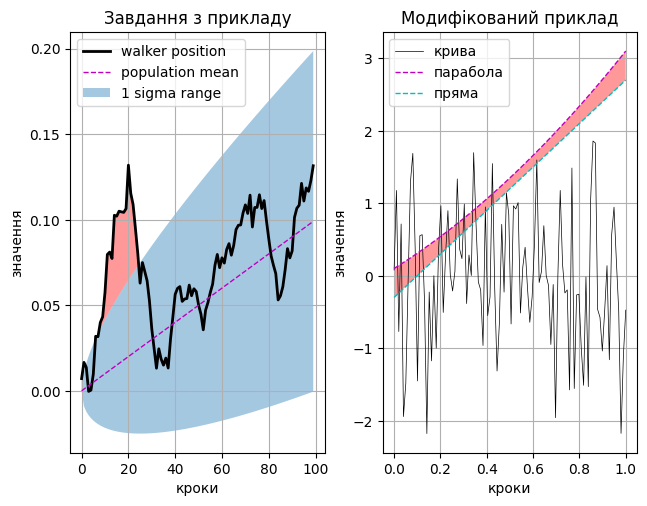

In [6]:
#np.random.seed(1)


t = np.arange(Nsteps)

mu = 0.001
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
fig.tight_layout()
# будуємо криву, та робимо її чорного кольору 'k' та задаємо її ширину 2
ax1.plot(t, X, color='k', lw=2, label='walker position')
ax1.plot(t, mu*t, lw=1, label='population mean', color='m', ls='--')
ax1.fill_between(t, lower_bound, upper_bound, facecolor='C0', alpha=0.4, label='1 sigma range')

ax1.fill_between(t, upper_bound, X, where=X > upper_bound, fc='red', alpha=0.4)
ax1.fill_between(t, lower_bound, X, where=X < lower_bound, fc='red', alpha=0.4)
ax1.set_title('Завдання з прикладу')

ax2.plot(x, y_a, color='k', lw=0.5, label='крива')
ax2.plot(x, y_b, lw=1, label='парабола', color='m', ls='--')
ax2.plot(x, y_c, lw=1, label='пряма', color='c', ls='--')
#ax2.fill_between(x, y_a, y_b, where=y_a < y_b, fc='red', alpha=0.4)
#ax2.fill_between(x, y_a, y_c, where=y_c > y_a, fc='red', alpha=0.4)
ax2.fill_between(x, y_b, y_c, where=y_c < y_b, fc='red', alpha=0.4)

ax2.set_title('Модифікований приклад')

for ax in ax1, ax2:
    ax.set_xlabel('кроки')
    ax.set_ylabel('значення')
    ax.grid()
    ax.legend(loc='upper left')